In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Regresion Lineal simple

En este trabajo disponemos de una base de datos de dos columnas: columna 1 es la poblacion, y columna 2 son ganancias de un negocio en una ciudad. Y cada fila son ciudades. Analizaremos los datos y veremos que hay una relacion lineal entre la cantidad de gente que vive en la ciudad y las ganancias del negocio

In [97]:
data = pd.read_csv("ex1data1.txt", header=None) 
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [98]:
#Cantidad de datos
data.shape

(97, 2)

In [99]:
#Columna 1
X = data.iloc[:,0].values

In [100]:
#Columna 2
y = data.iloc[:,1].values

In [101]:
m = len(y)

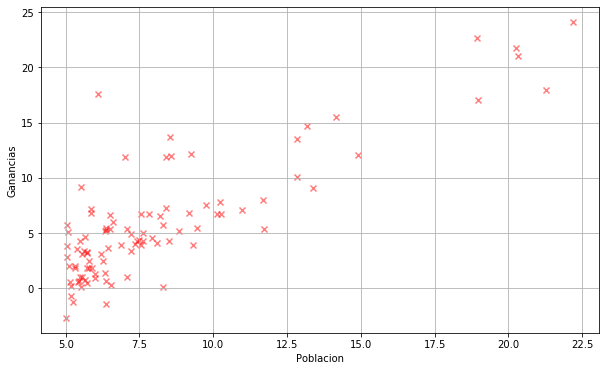

In [102]:
#Graficamos la informacion

plt.figure(figsize=(10,6))
plt.scatter(X, y, marker = "x", alpha =0.5, color = "red")
plt.xlabel("Poblacion")
plt.ylabel("Ganancias")
plt.grid()
plt.show()

Definitivamente hay una relacion lineal, por lo que podremos aplicar un modelo de regresion lineal para predecir correctamente las ganancias de un local que abra en una ciudad cualquiera con una determinada cantidad de habitantes

In [103]:
#Para implemental el modelo, convertimos los datos en matrices
X = X.reshape((m,1))
y = y.reshape((m,1))

#Inserto columnas de 1's en la matriz de las variables independientes (X)
X = np.insert(X,0,1, axis = 1)

### Funcion de costo
$$ J(\theta) = \dfrac {1}{2m} \displaystyle \sum _{i=1}^m \left (h_\theta (x_{i}) - y_{i} \right)^2 $$

La idea de la funcion de costo (loss function) es calcular el error que maneja el algoritmo dado parametros (theta) arbitrarios:

In [104]:
def computeCost(X, y, theta):
    """
    X matriz de mxn.
    y matriz de mx1.
    theta matriz de nx1.
    h es la funcion de hipotesis (basicamente la y predecida dado X arbitrario).
    Dados X, y, se calcula el costo (error) en funcion del parametro theta.
    J escalar.
    """
    h = np.dot(X, theta)
    J = np.sum(np.power(h - y, 2)) / (2*m)
    return J

In [105]:
#Hagamos alguna evaluacion, para esta base de datos, y un theta inicializado en ceros:
#El costo debe rondar 32
theta = np.zeros((X.shape[1],1))
computeCost(X,y,theta)

32.072733877455676

Perfecto, teniendo un costo de ~32 cuando los parametros son 0, vamos a querer reducir **J** al minimo, 
para obtener los parametros que mejor se ajustan a nuestros datos. Para lograr eso usaremos el algoritmo de **"Gradient descent"**

### Gradient descent
$$ \theta = \theta - \dfrac {\partial J(\theta)}{\partial \theta} $$

$$ \dfrac {\partial J(\theta)}{\partial \theta} = \dfrac {\alpha}{m}X^T(X\theta - y) $$

El algoritmo basicamente ajusta theta cada iteracion restandole la derivada de la funcion de costo respecto a theta:


In [106]:
def gradientDescent(X, y, theta, alpha, iterations):
    """
    En J_history se guarda el valor de costo despues de cada iteracion.
    En theta se guardan los theta optimizados
    """
    J_history = []
    for _ in range(iterations):
        temp = np.dot(X, theta) - y
        temp = np.dot(X.T,temp)
        theta = theta - (alpha/m) * temp
        J_history.append(computeCost(X, y, theta))
    return theta, J_history

In [107]:
#Configuramos el algoritmo, alpha es el "learning rate"
alpha = 0.01
iterations = 1000

#Lo inicializamos:
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)

### Graficamos los resultados 

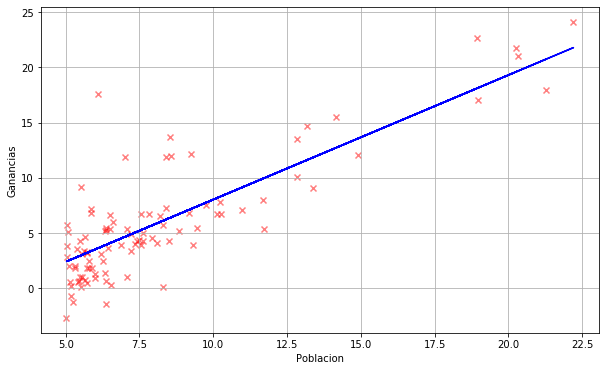

In [108]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,1], y, alpha = 0.5, marker ="x", color = "red")
plt.xlabel("Poblacion")
plt.ylabel("Ganancias")
plt.plot(X[:,1], np.dot(X, theta), color ="blue")
plt.grid()
plt.show()

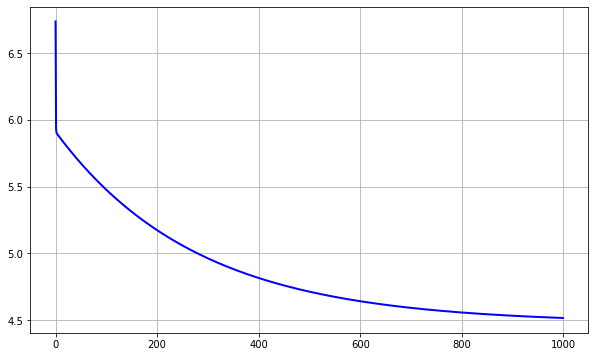

In [109]:
#Podemos ver como el algoritmo va mejorando el costo a medida que ajusta los parametros
plt.figure(figsize=(10,6))
plt.plot(range(len(J_history)), J_history, color ="blue", linewidth = 2)
plt.grid()
plt.show()

### Podemos predecir algunos valores

In [110]:
#Viendo el grafico, vemos que en una poblacion de 20 (20x10k) se obtendria una ganancia de 20 (20x10k) aprox.
def profit(theta, x_i):
    y_i = np.dot([1, x_i],theta)
    return y_i[0]
profit(theta, 20)

19.304481904289265

# Regresion Lineal Multiple
En esta segunda parte tenemos una nueva base de datos, con precios de propiedades en una determinada ciudad, en funcion del area y del numero de habitaciones: columna 1 es area en metros cuadrados, columna 2 es el numero de habitaciones, y la tercer columna es el precio

In [111]:
data = pd.read_csv("ex1data2.txt", header = None)
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [112]:
data.shape

(47, 3)

In [113]:
#Tomamos la columna 1 y 2 como variables independientes, y la columna 3 como dependiente de las otras dos
X = data.iloc[:,0:2].values
y = data.iloc[:,2].values
m = len(y)

In [114]:
#Debido a la naturaleza de la base de datos, debemos normalizar las entradas, para que todas se muevan
#dentro de un rango similar, en orden de optimizar el algoritmo

def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

X_norm, mu, sigma = featureNormalize(X)

### Funcion de costo

In [115]:
#Agregamos columna de 1's a X, y convertimos en una matriz a y
X_norm = np.insert(X_norm,0,1, axis = 1)
y = y.reshape((m,1))

#Inicializamos theta en ceros, y calculamos el costo
theta = np.zeros((X_norm.shape[1],1))
computeCost(X_norm,y,theta)

65591548106.45744

### Gradient Descent
Calculamos los parametros optimos de la misma manera que en la regresion lineal simple

In [116]:
#Configuramos el algoritmo, alpha es el "learning rate"
alpha = 0.1
iterations = 500

#Lo inicializamos:
theta, J_history = gradientDescent(X_norm, y, theta, alpha, iterations)

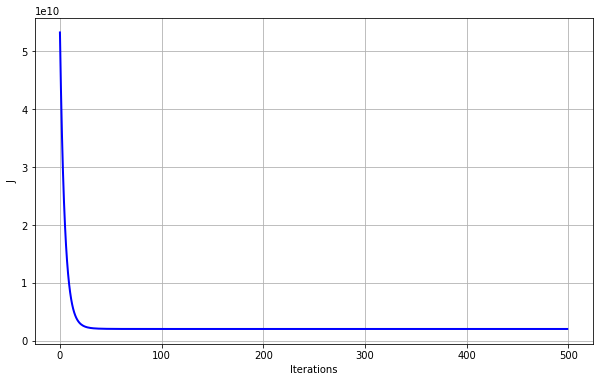

In [117]:
#Veamos como varia el costo despues de cada ajuste a theta en el algoritmo
plt.figure(figsize=(10,6))
plt.plot(J_history,  color ="blue", linewidth = 2)
plt.xlabel('Iterations')
plt.ylabel("J")
plt.grid()
plt.show()

In [118]:
#Veamos como se redujo el costo despues de aplicar el algoritmo y obtener los parametros optimos
computeCost(X_norm,y,theta)

2043280050.6028278

In [119]:
#Predecir precio de habitacion 1650 sq-ft y 3 habitaciones

price = theta[0] + theta[1] * (1650-mu[0])/sigma[0] + theta[2] * (3-mu[1])/sigma[1]
price[0]

293081.46433705394

## Ecuación normal

$$ \theta = (X^TX)^{-1}X^Ty$$

La ecuacion normal **no** necesita normalizar las variables independientes

In [120]:
#Insertamos columna de 1's
X = np.insert(X,0,1, axis = 1)

#Realizamos el calculo de theta
theta = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,y))

In [121]:
#Realizemos la misma prediccion que hicimos con el algoritmo anterior:
#Predecir precio de habitacion 1650 sq-ft y 3 habitaciones

price = theta[0] + theta[1]*1650 + theta[2]*3
price[0]

293081.4643348954